# Product Segmentation

In [ ]:
#!pip install yellowbrick

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data_file = "beer.csv"

In [5]:
beer_df = pd.read_csv( data_file )

In [6]:
beer_df

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Kronenbourg,170,7,5.2,0.73
3,Heineken,152,11,5.0,0.77
4,Old_Milwaukee,145,23,4.6,0.28
5,Augsberger,175,24,5.5,0.40
6,Srohs_Bohemian_Style,149,27,4.7,0.42
7,Miller_Lite,99,10,4.3,0.43
8,Budweiser_Light,113,8,3.7,0.40
9,Coors,140,18,4.6,0.44


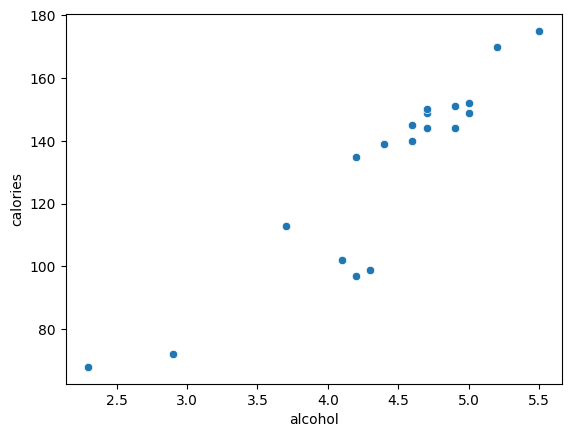

In [7]:
sn.scatterplot(data = beer_df,
               x = 'alcohol',
               y = 'calories');

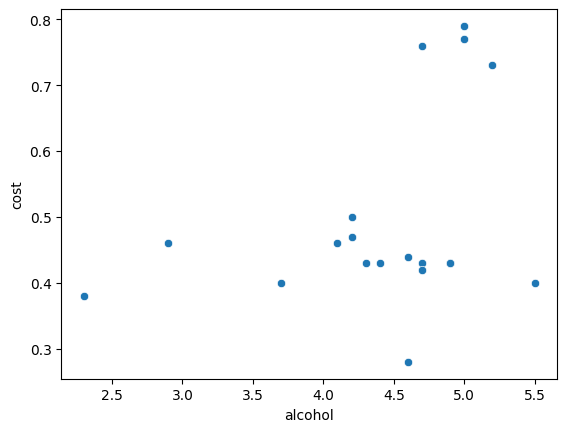

In [8]:
sn.scatterplot(data = beer_df,
               x = 'alcohol',
               y = 'cost');

## Scaling

#### Rescaling the dataset

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler = MinMaxScaler()
scaled_beer_df = scaler.fit_transform( beer_df[['calories',
                                                'sodium',
                                                'alcohol',
                                                'cost']] )

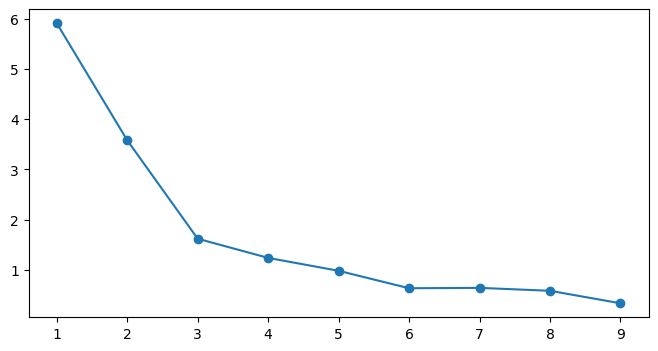

In [11]:
from sklearn.cluster import KMeans

cluster_range = range( 1, 10 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( scaled_beer_df )
  cluster_errors.append( clusters.inertia_ )

plt.figure(figsize=(8,4))
plt.plot( cluster_range, cluster_errors, marker = "o" );

#### Creating 4 Clusters

We will set k to 3 for running *KMeans* algorithm and create a new column *clusterid* in *beer_df* to capture the cluster number it is assigned to.

In [12]:
k = 4

clusters = KMeans( k, random_state = 42 )
clusters.fit( scaled_beer_df )
beer_df["clusterid"] = clusters.labels_

In [13]:
clusters.labels_

array([1, 1, 2, 2, 1, 1, 1, 0, 0, 1, 0, 0, 2, 2, 3, 1, 1, 3, 0],
      dtype=int32)

## Evaluating the quality of cluster using Silhouette score

#### Cluster 0

In [14]:
beer_df[beer_df.clusterid == 0]

,name,calories,sodium,alcohol,cost,clusterid
7,Miller_Lite,99,10,4.3,0.43,0
8,Budweiser_Light,113,8,3.7,0.40,0
10,Coors_Light,102,15,4.1,0.46,0
11,Michelob_Light,135,11,4.2,0.50,0
18,Schlitz_Light,97,7,4.2,0.47,0


#### Cluster 1

In [15]:
beer_df[beer_df.clusterid == 1]

,name,calories,sodium,alcohol,cost,clusterid
0,Budweiser,144,15,4.7,0.43,1
1,Schlitz,151,19,4.9,0.43,1
4,Old_Milwaukee,145,23,4.6,0.28,1
5,Augsberger,175,24,5.5,0.40,1
6,Srohs_Bohemian_Style,149,27,4.7,0.42,1
9,Coors,140,18,4.6,0.44,1
15,Hamms,139,19,4.4,0.43,1
16,Heilemans_Old_Style,144,24,4.9,0.43,1


#### Cluster 2

In [16]:
beer_df[beer_df.clusterid == 2]

,name,calories,sodium,alcohol,cost,clusterid
2,Kronenbourg,170,7,5.2,0.73,2
3,Heineken,152,11,5.0,0.77,2
12,Becks,150,19,4.7,0.76,2
13,Kirin,149,6,5.0,0.79,2


#### Cluster 3

In [17]:
beer_df[beer_df.clusterid == 3]

,name,calories,sodium,alcohol,cost,clusterid
14,Pabst_Extra_Light,68,15,2.3,0.38,3
17,Olympia_Goled_Light,72,6,2.9,0.46,3


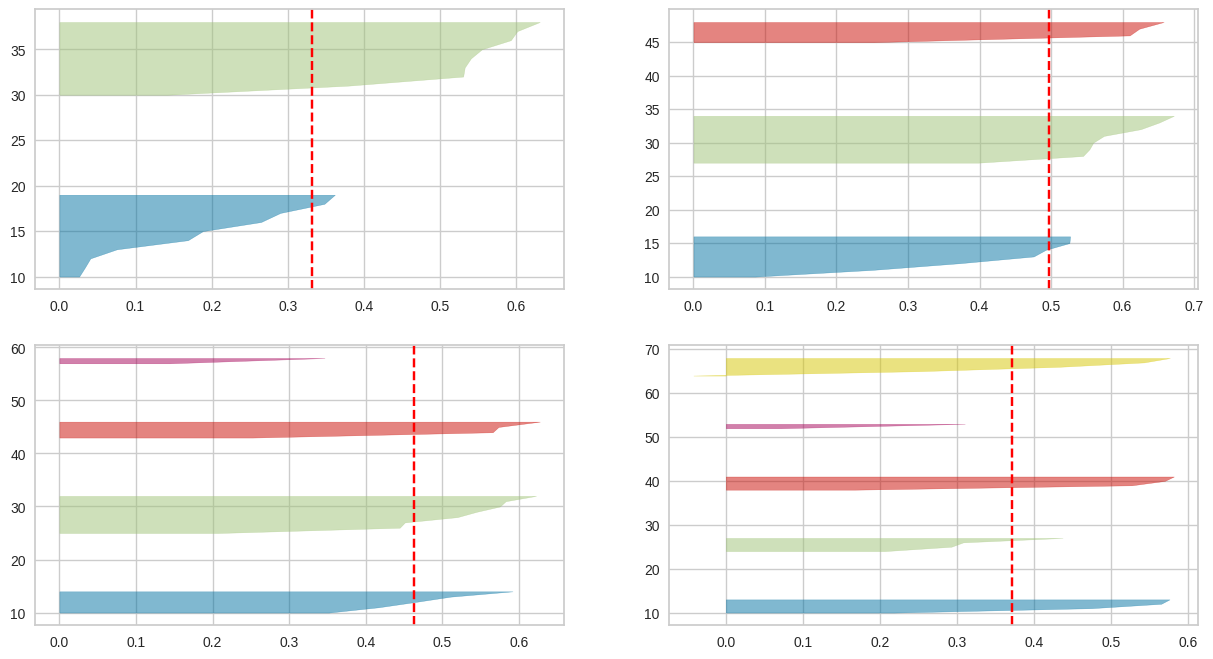

In [18]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
num_clusters = [2, 3, 4, 5]
for i, k in enumerate(num_clusters):
    km = KMeans(n_clusters=k,
                random_state=42)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km,
                                      colors='yellowbrick',
                                      ax=ax[q][mod])
    visualizer.fit(scaled_beer_df)

### Calculating Silhouette Score

In [19]:
from sklearn.metrics import silhouette_score

In [20]:
for k in [2, 3, 4, 5]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_beer_df)
    score = silhouette_score(scaled_beer_df, kmeans.labels_)
    print(f"k = {k}, silhouette_score = {score:.3f}")

k = 2, silhouette_score = 0.332
k = 3, silhouette_score = 0.497
k = 4, silhouette_score = 0.463
k = 5, silhouette_score = 0.372


## Dendrogram

In [24]:
scaled_beer_df = pd.DataFrame(scaled_beer_df,
                              columns = ['calories',
                                         'sodium',
                                         'alcohol',
                                         'cost'], index = beer_df.name)

In [25]:
scaled_beer_df

,calories,sodium,alcohol,cost
name,,,,
Budweiser,0.710280,0.428571,0.75000,0.294118
Schlitz,0.775701,0.619048,0.81250,0.294118
Kronenbourg,0.953271,0.047619,0.90625,0.882353
Heineken,0.785047,0.238095,0.84375,0.960784
Old_Milwaukee,0.719626,0.809524,0.71875,0.000000
Augsberger,1.000000,0.857143,1.00000,0.235294
Srohs_Bohemian_Style,0.757009,1.000000,0.75000,0.274510
Miller_Lite,0.289720,0.190476,0.62500,0.294118
Budweiser_Light,0.420561,0.095238,0.43750,0.235294


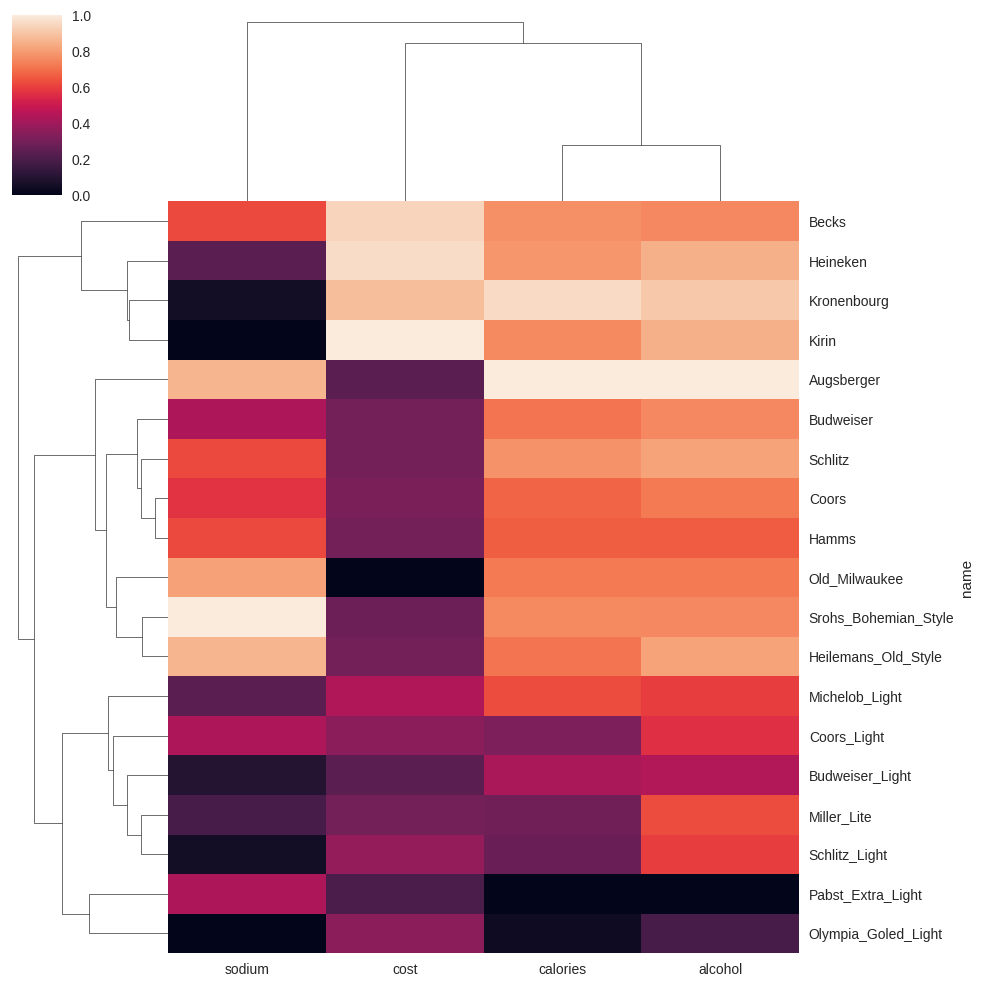

In [26]:
sn.clustermap(scaled_beer_df)